In [134]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import os
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [135]:
df = pd.read_excel('/Users/enwezorifeanyi/Downloads/SimpliLearn Bootcamp/CB DS - Machine Learning/Assessment/1645792390_cep1_dataset.xlsx')

In [136]:
#Structure of the data and missing values, missing values & duplicates
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [137]:
# there are 303 rows & 14 columns
df.shape

(303, 14)

In [138]:
#There is one duplicate row
df.duplicated().sum()

1

In [139]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [140]:
#feature ca has values 0-3 from the dataset description however from code its 0-4
df['ca'].unique()

array([0, 2, 1, 3, 4])

In [141]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [142]:
df[df['ca'] == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [143]:
df['ca'].replace(4, np.NaN, inplace=True)

In [144]:
df['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [145]:
#thal has values 3,6 & 7 however the dataset description has 0-3 
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [146]:
#With the value counts, we will change 1 to 3(normal), 2 to 6(fixed defect), 3 to 7(reverse defect) 
#and np.NaN for 0
df['thal'].replace(3,7,inplace=True)
df['thal'].replace(2,6,inplace=True)
df['thal'].replace(1,3,inplace=True)
df['thal'].replace(0,np.NaN,inplace=True)

In [147]:
df['thal'].unique()

array([ 3.,  6.,  7., nan])

In [148]:
#check for missing values and replace them
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

<AxesSubplot: >

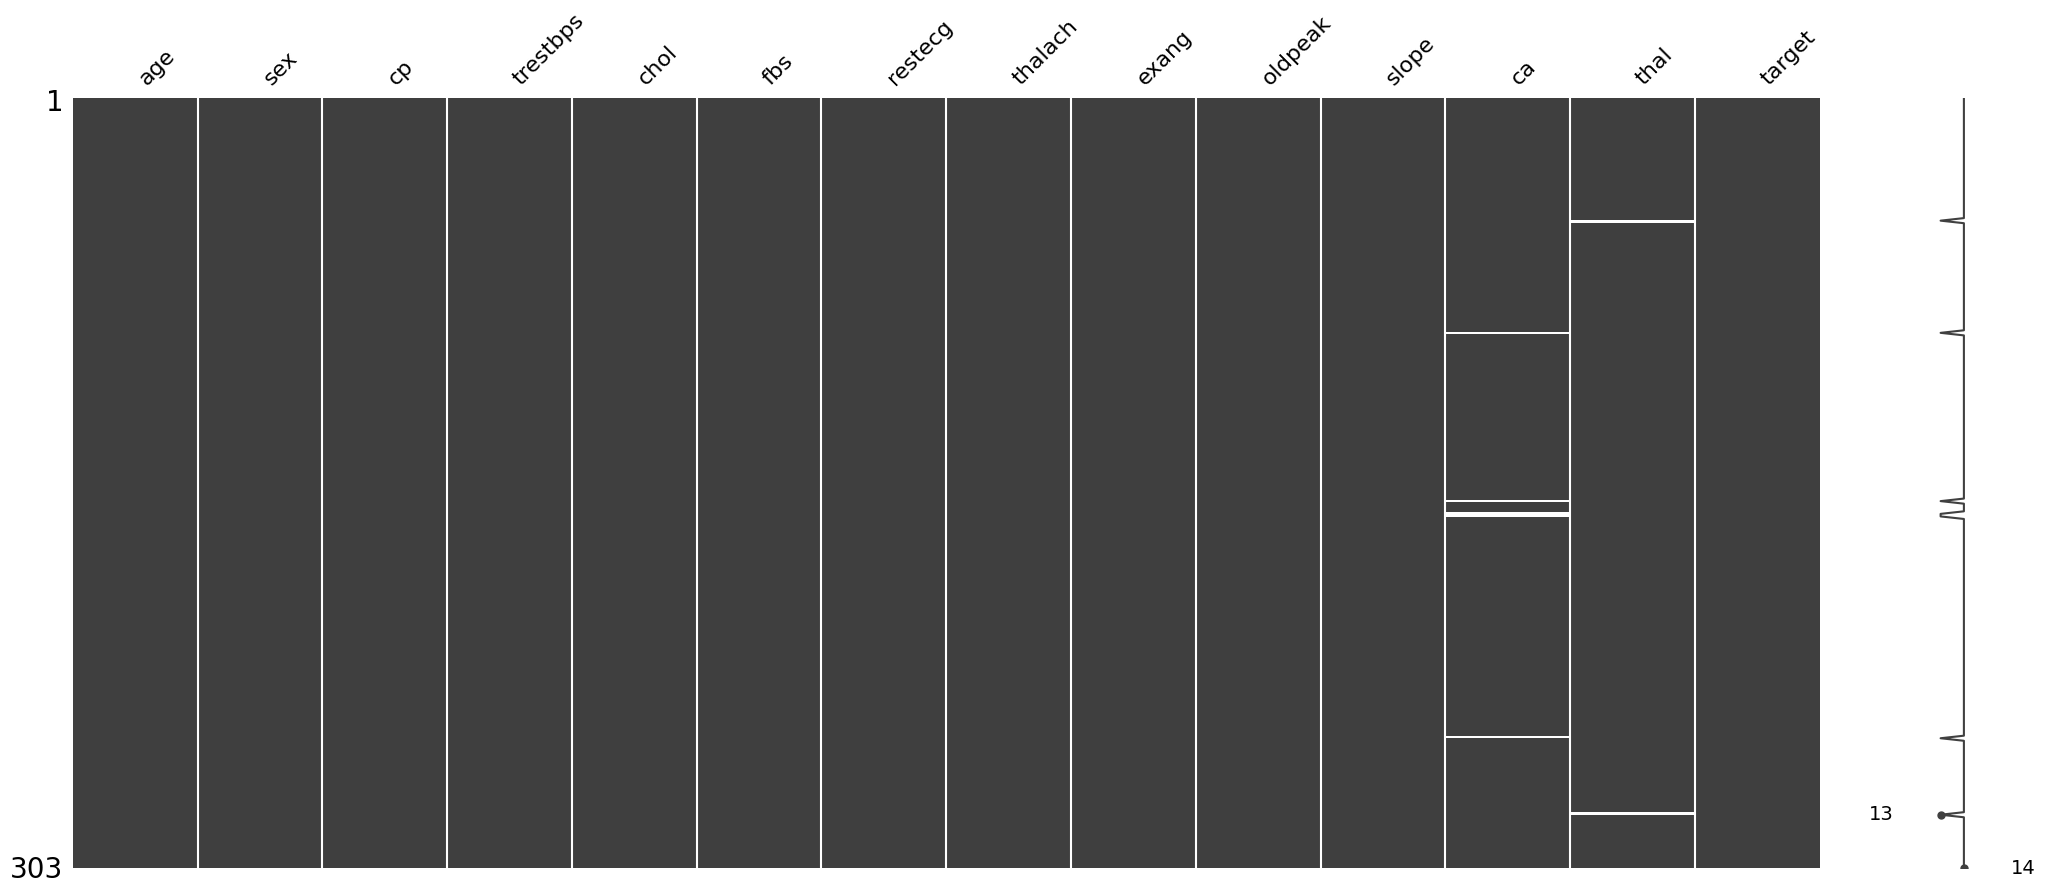

In [149]:
#Visualize the missing values and see if theres any correlation
msno.matrix(df)

In [150]:
df = df.fillna(df.median())

In [151]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [152]:
duplicated = df.duplicated().sum()
if duplicated:
    print('Duplicates rows in dataset are: ',duplicated)
else:
    print('dataset contains no duplicated values')

Duplicates rows in dataset are:  1


In [153]:
duplicated = df[df.duplicated(keep=False)]
duplicated

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,6.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,6.0,1


In [154]:
df = df.drop_duplicates()

In [155]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,3.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,6.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,6.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,6.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0.0,7.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0.0,7.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2.0,7.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1.0,7.0,0


In [156]:
df.shape

(302, 14)

In [157]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.665563,6.208609,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.935142,0.939813,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,6.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,7.000000,1.000000


age            AxesSubplot(0.125,0.53;0.0945122x0.35)
sex         AxesSubplot(0.238415,0.53;0.0945122x0.35)
cp          AxesSubplot(0.351829,0.53;0.0945122x0.35)
trestbps    AxesSubplot(0.465244,0.53;0.0945122x0.35)
chol        AxesSubplot(0.578659,0.53;0.0945122x0.35)
fbs         AxesSubplot(0.692073,0.53;0.0945122x0.35)
restecg     AxesSubplot(0.805488,0.53;0.0945122x0.35)
thalach        AxesSubplot(0.125,0.11;0.0945122x0.35)
exang       AxesSubplot(0.238415,0.11;0.0945122x0.35)
oldpeak     AxesSubplot(0.351829,0.11;0.0945122x0.35)
slope       AxesSubplot(0.465244,0.11;0.0945122x0.35)
ca          AxesSubplot(0.578659,0.11;0.0945122x0.35)
thal        AxesSubplot(0.692073,0.11;0.0945122x0.35)
target      AxesSubplot(0.805488,0.11;0.0945122x0.35)
dtype: object

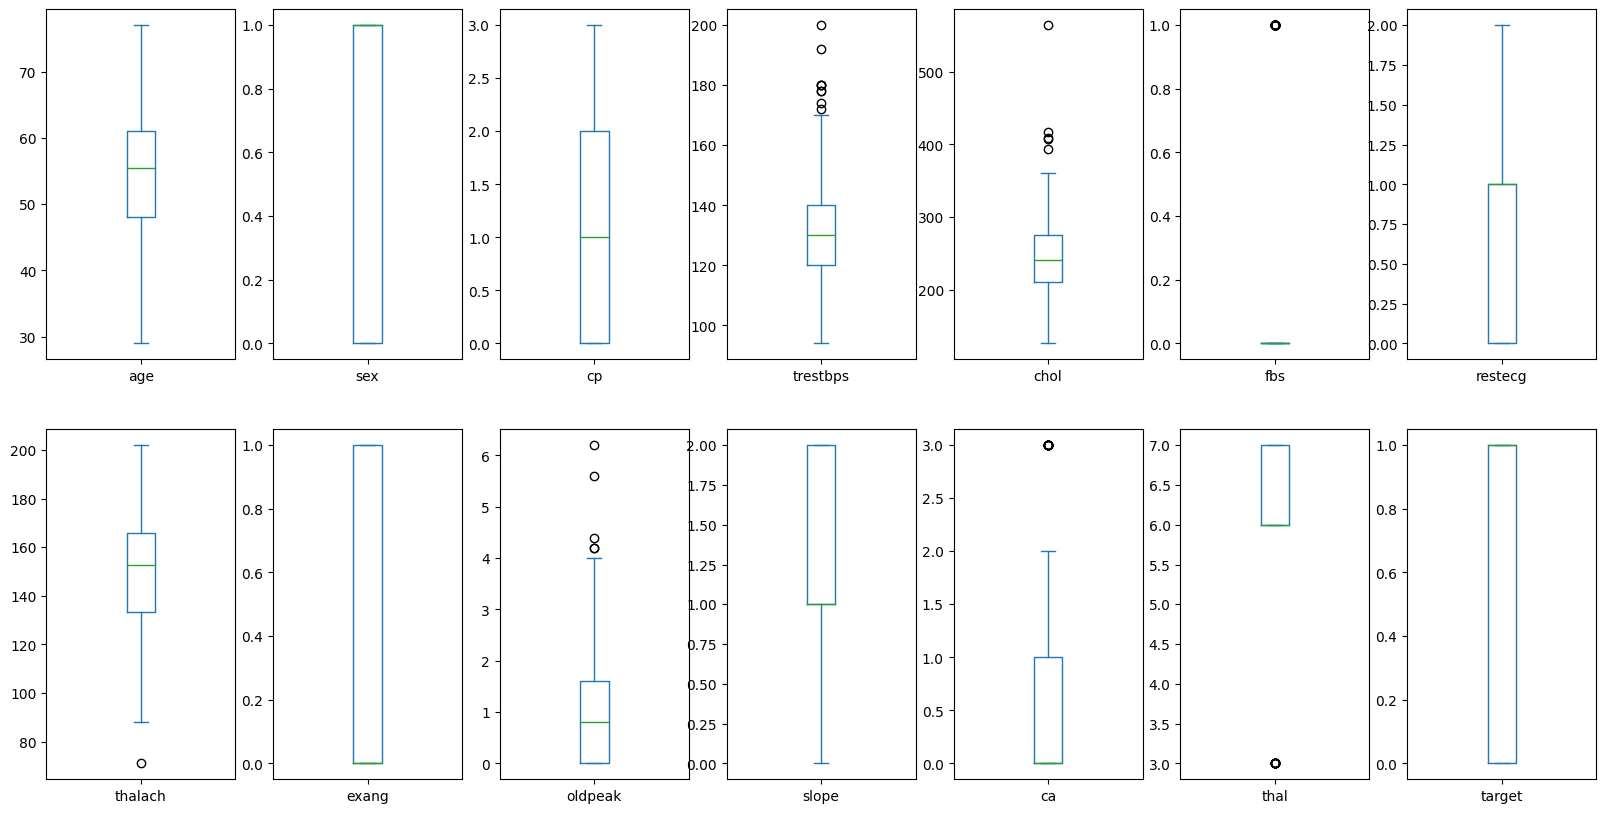

In [158]:
df.plot(kind = 'box', subplots=True, layout=(2,7), figsize = (20,10))

In [159]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

<AxesSubplot: xlabel='target', ylabel='chol'>

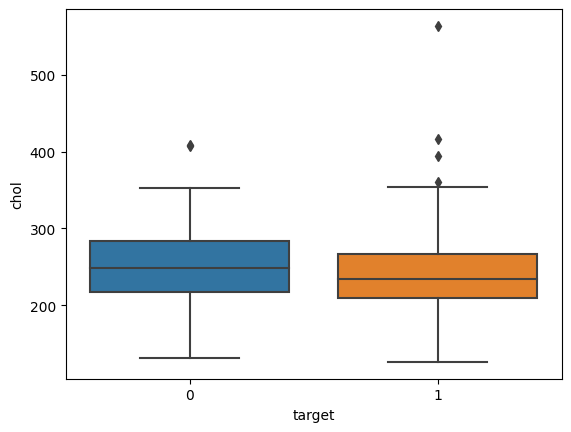

In [160]:
sns.boxplot(df, x = 'target', y = 'chol')

In [161]:
df['age'].quantile(0.75)

61.0

In [162]:
##Calculating for outliers
Q1 = df[['age','trestbps','chol','thalach','oldpeak']].quantile(0.25)
Q1

age          48.00
trestbps    120.00
chol        211.00
thalach     133.25
oldpeak       0.00
Name: 0.25, dtype: float64

In [163]:
Q3 = df[['age','trestbps','chol','thalach','oldpeak']].quantile(0.75)
Q3

age          61.00
trestbps    140.00
chol        274.75
thalach     166.00
oldpeak       1.60
Name: 0.75, dtype: float64

In [164]:
#defining and removing outliers
IQR = Q3 -Q1
IQR

age         13.00
trestbps    20.00
chol        63.75
thalach     32.75
oldpeak      1.60
dtype: float64

In [165]:
Upper_Mild_Outlier = Q3 + (1.5*IQR)
Upper_Mild_Outlier

age          80.500
trestbps    170.000
chol        370.375
thalach     215.125
oldpeak       4.000
dtype: float64

In [166]:
Lower_Mild_Outlier = Q1 - 1.5*IQR
Lower_Mild_Outlier

age          28.500
trestbps     90.000
chol        115.375
thalach      84.125
oldpeak      -2.400
dtype: float64

In [167]:
##identifying the outliers as an np array
upper_array = np.where(df[['age','trestbps','chol','thalach','oldpeak']]>=Upper_Mild_Outlier)[0]
upper_array

array([  8,  28,  85,  96, 101, 101, 110, 152, 194, 202, 203, 219, 219,
       220, 222, 222, 227, 240, 245, 247, 249, 259, 265, 290, 291, 294])

In [168]:
lower_array = np.where(df[['age','trestbps','chol','thalach','oldpeak']]<=Lower_Mild_Outlier)[0]
lower_array

array([271])

In [169]:
## remmoving outliers from dataframe
df.drop(index=upper_array,inplace=True)

In [170]:
df.drop(index=lower_array,inplace=True)

In [171]:
df.shape

(278, 14)

In [172]:
X = df.drop(columns='target')
y = df['target']

In [173]:
#Let's rename the categorical feature values for better visualization
df['target'] = df['target'].replace({1: 'Disease', 0: 'No_disease'})
df['sex'] = df['sex'].replace({1: 'Male', 0: 'Female'})
df['cp'] = df['cp'].replace({0: 'typical_angina', 
                          1: 'atypical_angina', 
                          2:'non-anginal pain',
                          3: 'asymtomatic'})
df['exang'] = df['exang'].replace({1: 'Yes', 0: 'No'})
df['fbs'] = df.fbs.replace({1: 'True', 0: 'False'})
df['slope'] = df['slope'].replace({0: 'upsloping', 1: 'flat',2:'downsloping'})
df['thal'] = df['thal'].replace({6: 'fixed_defect', 7: 'reversable_defect', 3:'normal'})

<AxesSubplot: xlabel='target', ylabel='oldpeak'>

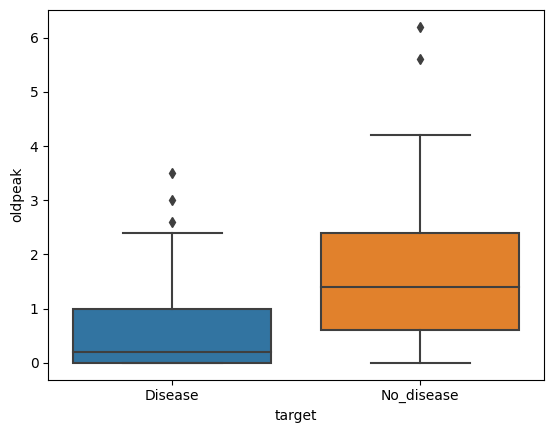

In [174]:
sns.boxplot(df, x = 'target', y = 'oldpeak')

Text(0.5, 1.0, 'Disease Distribution plot')

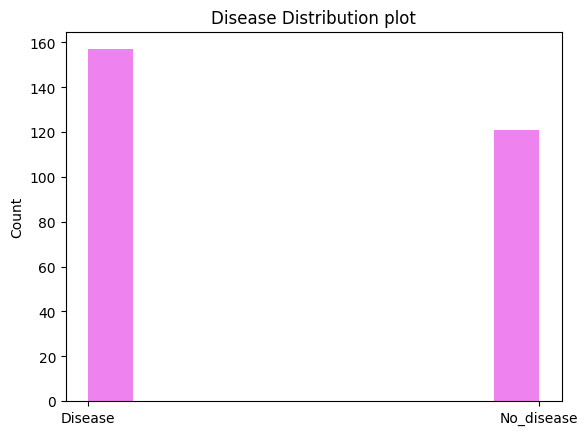

In [175]:
#Study the occurence of CVD across the age category
plt.hist(df['target'],color = 'violet')
plt.ylabel('Count')
plt.title('Disease Distribution plot')

Text(0.5, 1.0, 'Disease Distribution')

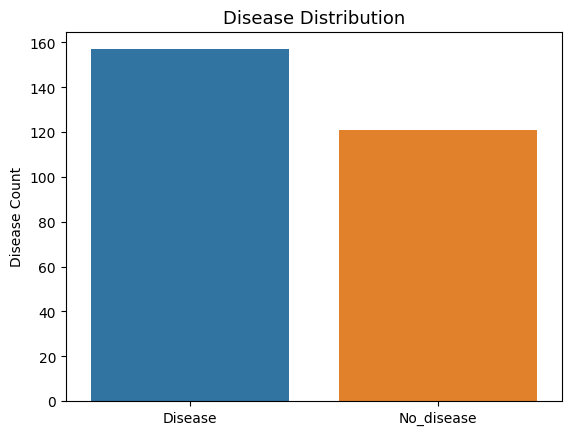

In [176]:
sns.barplot(x = df['target'].value_counts().index, y = df['target'].value_counts().values)
plt.ylabel('Disease Count')
plt.title('Disease Distribution', fontsize=13)

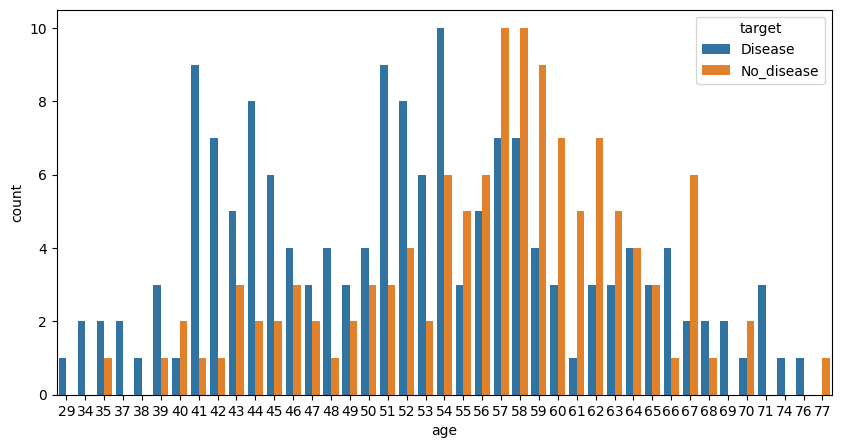

In [177]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data = df, x='age', hue = 'target')
plt.show()

People who are 54 years are at greater risk of having CVD, while people who are 51 & 41 have equal likelihood, then 45 & 52 and so on

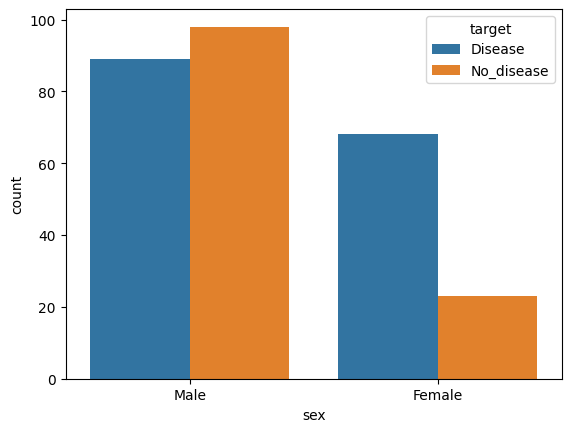

In [178]:
sns.countplot(data = df, x = 'sex', hue = 'target')
plt.show()

Males are at higher risk of suffering from CVD than females as can be seen from the plot

<AxesSubplot: xlabel='trestbps', ylabel='count'>

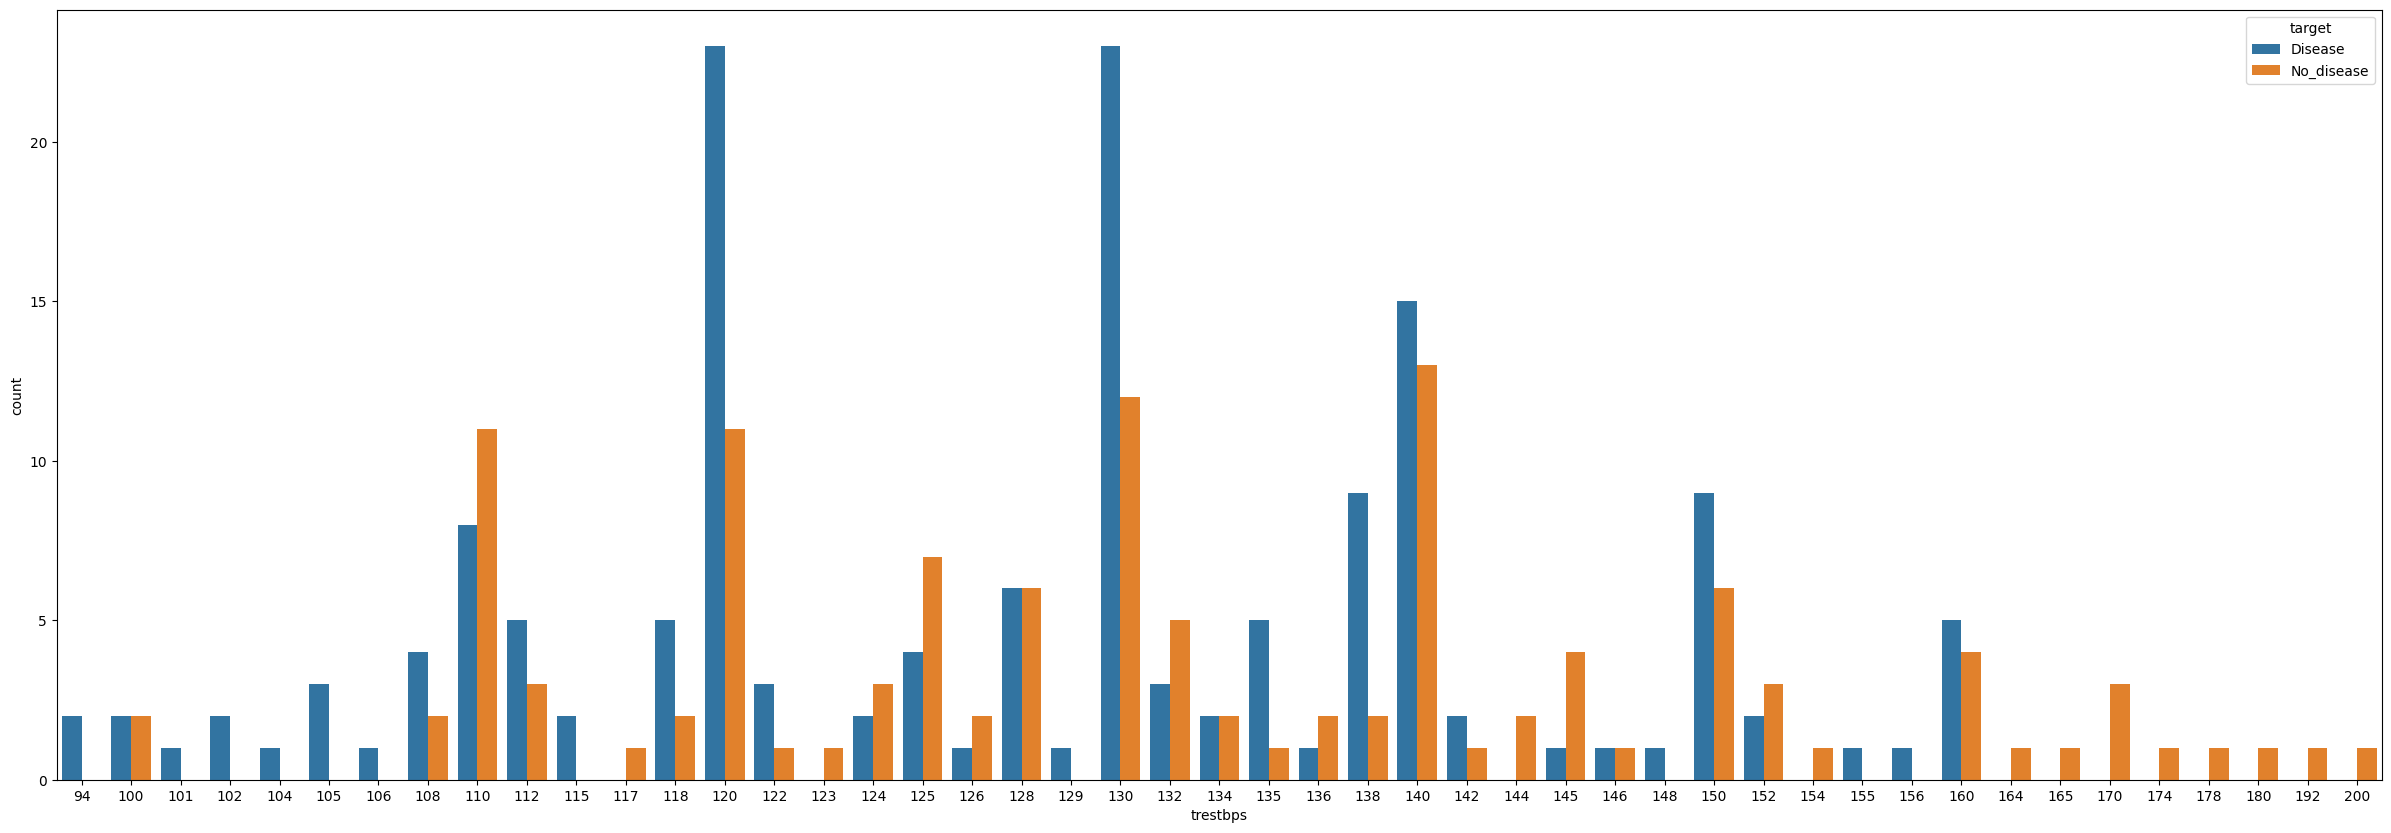

In [179]:
plt.figure(figsize=(30,10))
sns.countplot(data=df, x='trestbps', hue='target')

Patients with trestbps of 120 & 130 are at higher risk of CVD

<AxesSubplot: xlabel='thal', ylabel='count'>

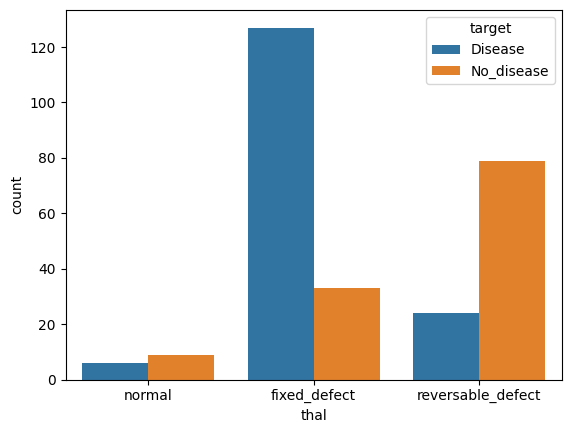

In [180]:
#plt.figure(figsize=(40,10))
sns.countplot(data=df, x='thal', hue='target')

The thalassemia fixed_defect is strongly correlated with CVD

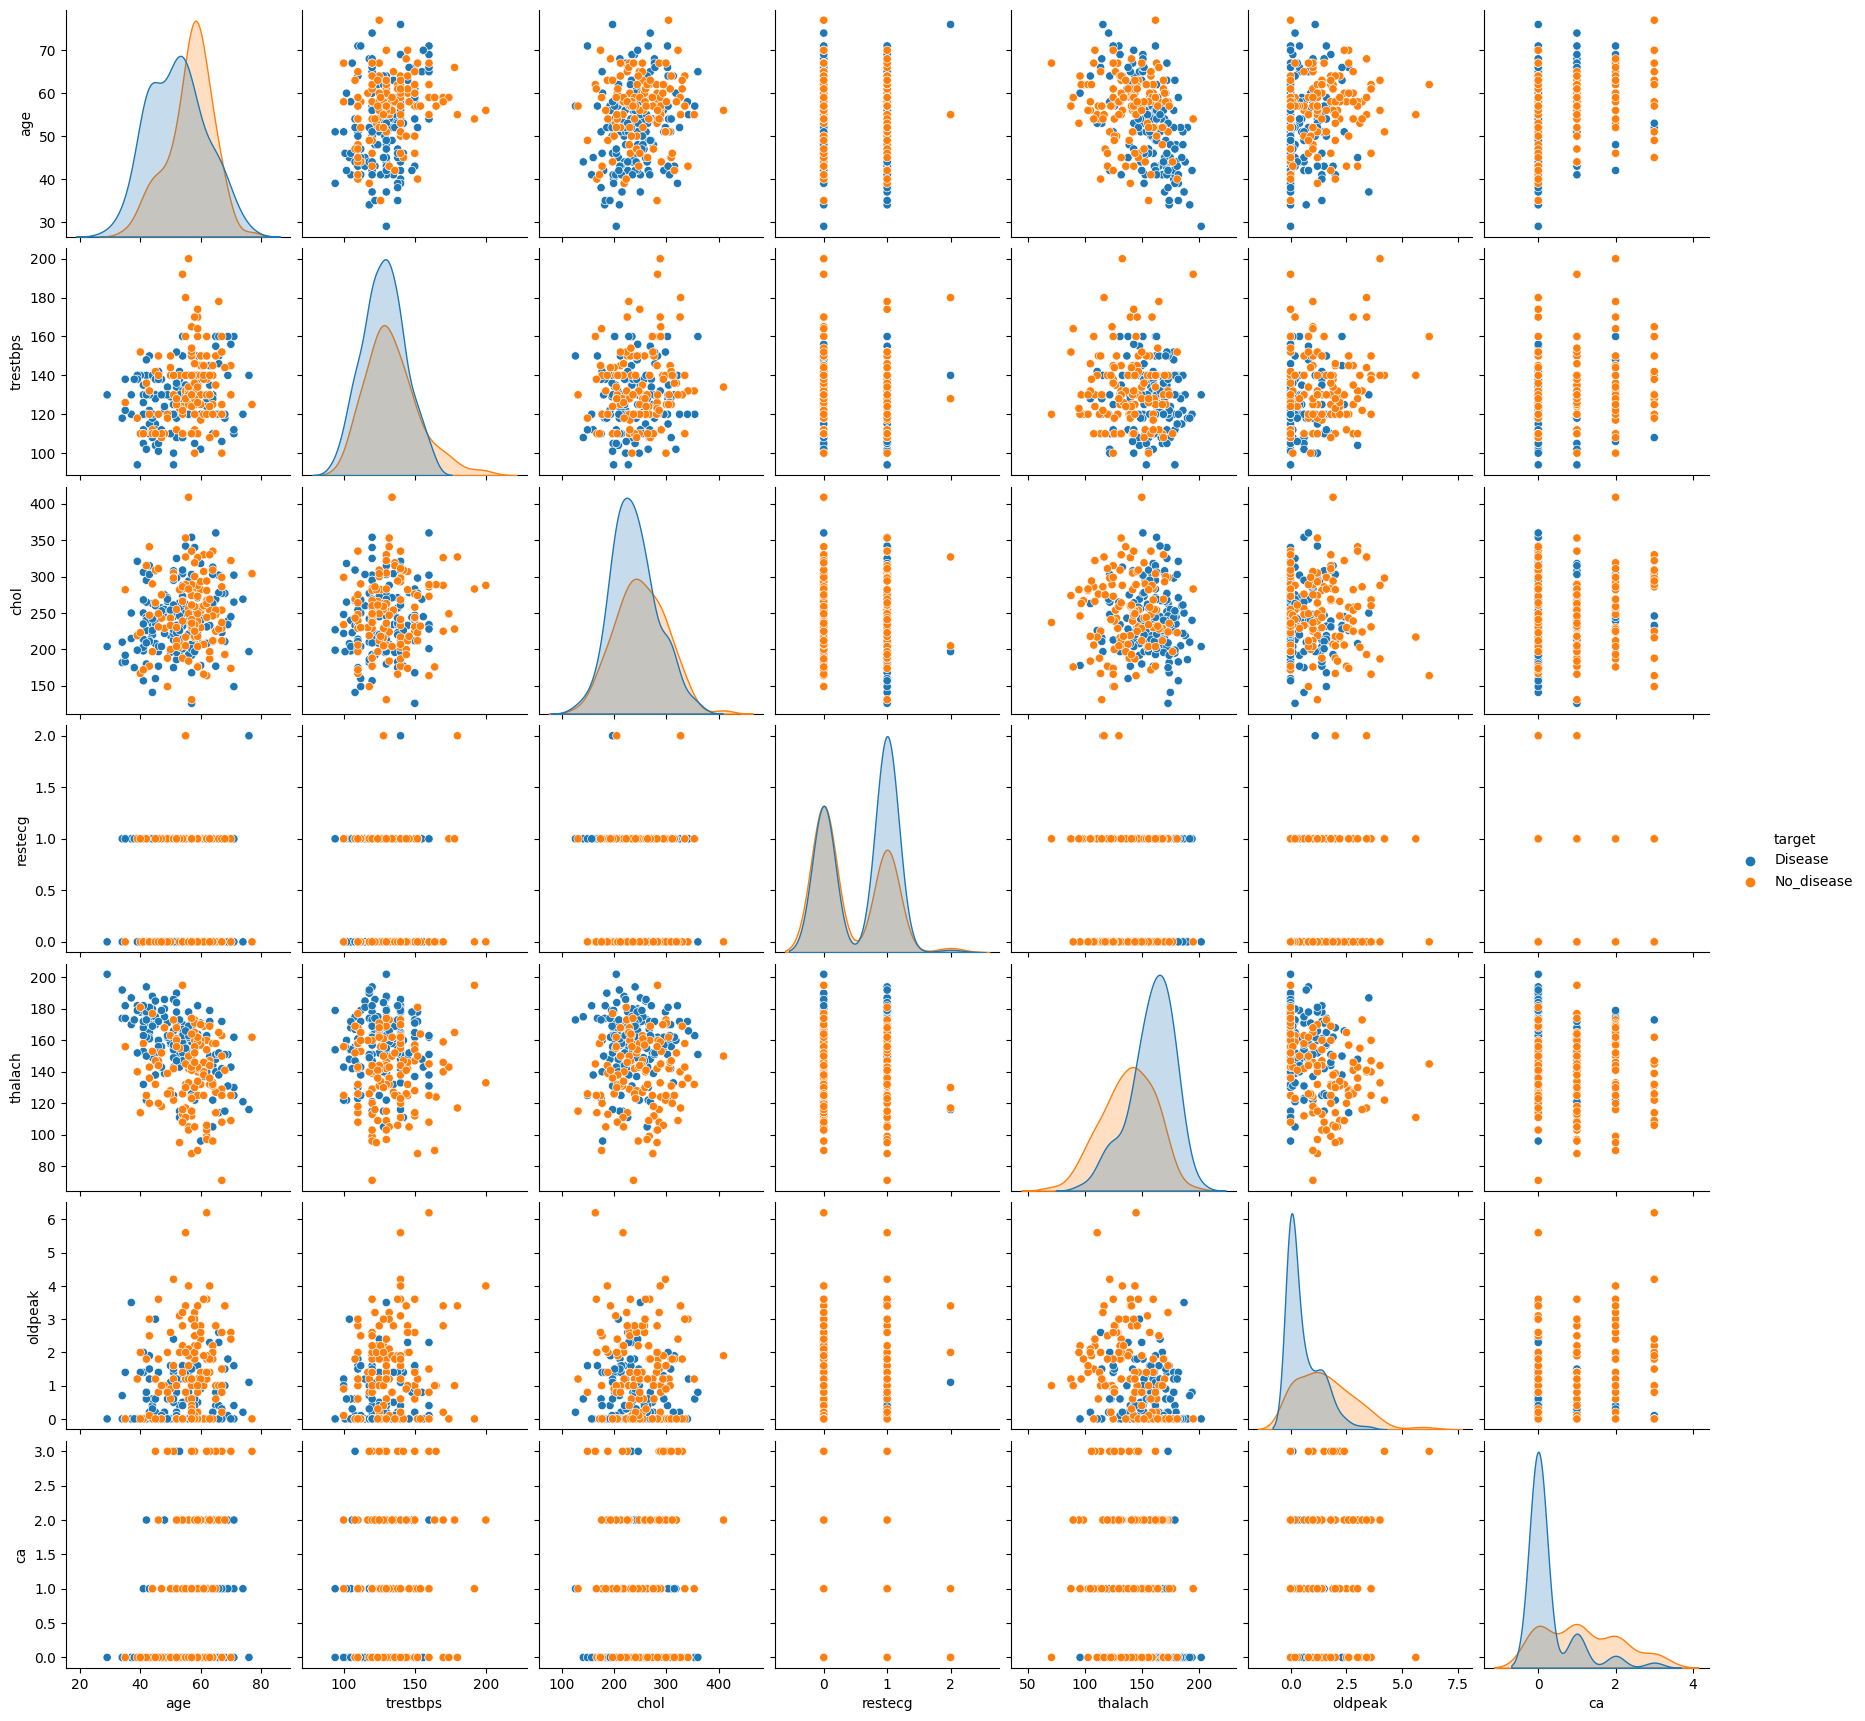

In [181]:
#(j) Use a pairplot to understand the relationship between all the given variables
sns.pairplot(data=df, hue='target')

<AxesSubplot: >

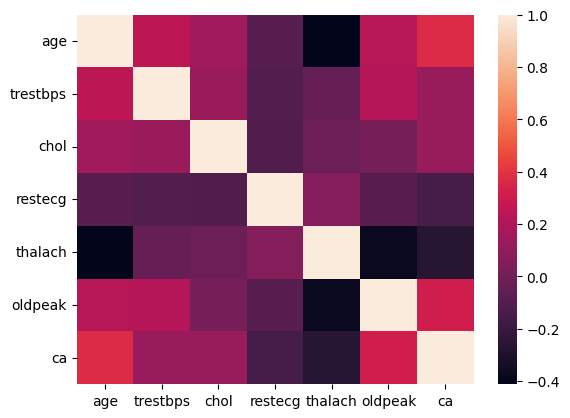

In [182]:
sns.heatmap(df.corr())

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
Lr = LogisticRegression()
Lr.fit(X_train, y_train)

LogisticRegression()

In [190]:
predicted_scores = Lr.predict(X_test)

In [191]:
from sklearn.metrics import accuracy_score

In [192]:
Score_Lr = accuracy_score(y_test, predicted_scores)

In [193]:
Score_Lr

0.9142857142857143